##DCNN_model

used data : MNIST(28*28 Matrix = 784 pixel)

In [1]:
#import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
#load data & nomalize data
def load_mnist_dataset():
  (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = mnist.load_data()

  train_validation_images = train_validation_images.reshape(-1,28,28,1)
  test_images = test_images.reshape(-1,28,28,1)

  train_validation_images = train_validation_images / 255.
  test_images = test_images / 255.

  n_train_validation = train_validation_images.shape[0]
  train_ratio = 0.8
  n_train = int(n_train_validation * train_ratio)

  train_x = train_validation_images[:n_train]
  train_y = train_validation_labels[:n_train]
  validation_x = train_validation_images[n_train:]
  validation_y = train_validation_labels[n_train:]
  test_x = test_images
  test_y = test_labels

#train set
  print('Image :', train_x.shape)
  print('Label :', train_y.shape)
#validation set
  print('Image :', validation_x.shape)
  print('Label :', validation_y.shape)
#train and validation set
  print('Image :', test_x.shape)
  print('Label :', test_y.shape)

  return train_x, train_y, validation_x, validation_y, test_x, test_y

In [3]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_mnist_dataset()

11490434/11490434 [==============================] - 2s 0us/step
Image : (48000, 28, 28, 1)
Label : (48000,)
Image : (12000, 28, 28, 1)
Label : (12000,)
Image : (10000, 28, 28, 1)
Label : (10000,)


In [4]:
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=48, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=60, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=72, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [5]:
x = tf.random.uniform(shape=(1,28,28,1))
for layer in model.layers:
    x=layer(x)
    print(layer.__class__.__name__, 'output shape:\t',x.shape)

Conv2D output shape:	 (1, 28, 28, 24)
BatchNormalization output shape:	 (1, 28, 28, 24)
Conv2D output shape:	 (1, 28, 28, 36)
BatchNormalization output shape:	 (1, 28, 28, 36)
Conv2D output shape:	 (1, 28, 28, 48)
BatchNormalization output shape:	 (1, 28, 28, 48)
MaxPooling2D output shape:	 (1, 14, 14, 48)
Conv2D output shape:	 (1, 14, 14, 60)
BatchNormalization output shape:	 (1, 14, 14, 60)
MaxPooling2D output shape:	 (1, 7, 7, 60)
Conv2D output shape:	 (1, 7, 7, 72)
BatchNormalization output shape:	 (1, 7, 7, 72)
MaxPooling2D output shape:	 (1, 3, 3, 72)
Flatten output shape:	 (1, 648)
Dense output shape:	 (1, 128)
Dropout output shape:	 (1, 128)
Dense output shape:	 (1, 10)


In [6]:
history = model.fit(train_x, train_y, batch_size=9, epochs=10,\
                    verbose=2, validation_data=(validation_x, validation_y))

Epoch 1/10
5334/5334 - 39s - loss: 0.2045 - accuracy: 0.9418 - val_loss: 0.0521 - val_accuracy: 0.9852 - 39s/epoch - 7ms/step
Epoch 2/10
5334/5334 - 34s - loss: 0.0957 - accuracy: 0.9740 - val_loss: 0.0463 - val_accuracy: 0.9892 - 34s/epoch - 6ms/step
Epoch 3/10
5334/5334 - 32s - loss: 0.0756 - accuracy: 0.9797 - val_loss: 0.0392 - val_accuracy: 0.9908 - 32s/epoch - 6ms/step
Epoch 4/10
5334/5334 - 31s - loss: 0.0612 - accuracy: 0.9839 - val_loss: 0.0406 - val_accuracy: 0.9908 - 31s/epoch - 6ms/step
Epoch 5/10
5334/5334 - 31s - loss: 0.0495 - accuracy: 0.9865 - val_loss: 0.0332 - val_accuracy: 0.9916 - 31s/epoch - 6ms/step
Epoch 6/10
5334/5334 - 33s - loss: 0.0425 - accuracy: 0.9884 - val_loss: 0.0546 - val_accuracy: 0.9902 - 33s/epoch - 6ms/step
Epoch 7/10
5334/5334 - 33s - loss: 0.0374 - accuracy: 0.9900 - val_loss: 0.0417 - val_accuracy: 0.9914 - 33s/epoch - 6ms/step
Epoch 8/10
5334/5334 - 31s - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.0442 - val_accuracy: 0.9923 - 31s/epoch - 6

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 24)       96        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 36)        7812      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 36)       144       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 48)        15600     
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 48)       1

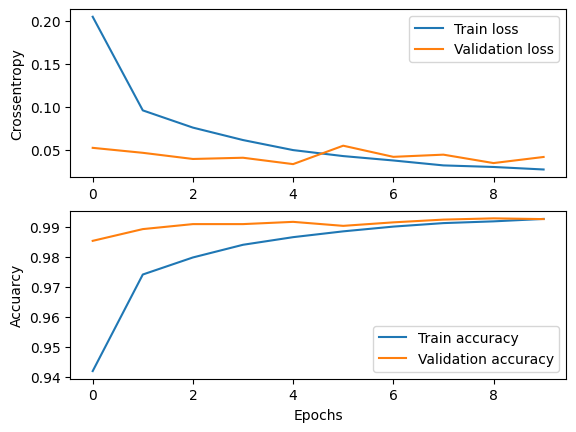

In [8]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

In [9]:
result= model.evaluate(test_x, test_y, verbose=2)

print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

313/313 - 2s - loss: 0.0248 - accuracy: 0.9941 - 2s/epoch - 6ms/step
Test loss : 0.0248	 Test accuracy : 99.41%


In [10]:
layers=model.layers
print(layers)

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d94e20>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d94e80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d94280>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d94be0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d94310>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc9e3cdf90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcc9e3cdc00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d4e620>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d941c0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcc82715bd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d4e260>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d4e650>, <keras.layers.pooling.max_poolin

In [11]:
layers[0].get_weights()[0]

array([[[[ 0.1812109 , -0.12693597, -0.00866605, -0.06165675,
           0.28840184, -0.22983041, -0.10070968,  0.10052921,
           0.4422285 ,  0.4122027 ,  0.29471925,  0.11567351,
          -0.03956615, -0.0800435 , -0.11204906, -0.32531837,
           0.10911869, -0.15064517, -0.01366873, -0.22484507,
           0.03182582,  0.35003218,  0.48130575, -0.1722314 ]],

        [[-0.03406924,  0.03541625, -0.15412766, -0.16411476,
           0.06304011, -0.18849261, -0.02276547,  0.27371457,
          -0.14743184,  0.01889381,  0.00844503, -0.2668566 ,
           0.0069873 ,  0.02044185,  0.12013157, -0.1833473 ,
           0.20850696, -0.33507732, -0.2491004 ,  0.03966894,
           0.08819137,  0.04837749,  0.22374758, -0.47549593]],

        [[ 0.48320606,  0.00571584, -0.15272017, -0.27808577,
          -0.5946683 ,  0.09340913, -0.08132784, -0.04808783,
           0.04820029, -0.40950048, -0.38713217, -0.43738538,
          -0.07409314,  0.20355622,  0.43500027,  0.23554353,
  

313/313 [==============================] - 2s 4ms/step
Probabilty is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


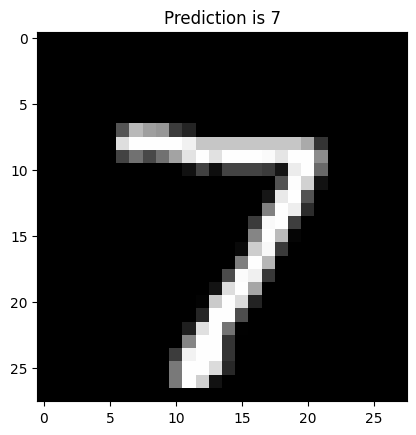

In [12]:
prediction = model.predict(test_x)
plt.imshow(test_x[0], 'gray')
print('Probabilty is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[0])))
plt.show()

In [13]:
layers=model.layers
print(layers)

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d94e20>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d94e80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d94280>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d94be0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d94310>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc9e3cdf90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcc9e3cdc00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d4e620>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d941c0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcc82715bd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcc14d4e260>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fcc14d4e650>, <keras.layers.pooling.max_poolin

In [14]:
layers[0].get_weights()[0]

array([[[[ 0.1812109 , -0.12693597, -0.00866605, -0.06165675,
           0.28840184, -0.22983041, -0.10070968,  0.10052921,
           0.4422285 ,  0.4122027 ,  0.29471925,  0.11567351,
          -0.03956615, -0.0800435 , -0.11204906, -0.32531837,
           0.10911869, -0.15064517, -0.01366873, -0.22484507,
           0.03182582,  0.35003218,  0.48130575, -0.1722314 ]],

        [[-0.03406924,  0.03541625, -0.15412766, -0.16411476,
           0.06304011, -0.18849261, -0.02276547,  0.27371457,
          -0.14743184,  0.01889381,  0.00844503, -0.2668566 ,
           0.0069873 ,  0.02044185,  0.12013157, -0.1833473 ,
           0.20850696, -0.33507732, -0.2491004 ,  0.03966894,
           0.08819137,  0.04837749,  0.22374758, -0.47549593]],

        [[ 0.48320606,  0.00571584, -0.15272017, -0.27808577,
          -0.5946683 ,  0.09340913, -0.08132784, -0.04808783,
           0.04820029, -0.40950048, -0.38713217, -0.43738538,
          -0.07409314,  0.20355622,  0.43500027,  0.23554353,
  

In [15]:
layers[0].get_weights()[0].shape

(3, 3, 1, 24)